In [1]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts

from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import seaborn as sns

/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [2]:
channels = constants.channel_list
paths , class_list, sleep_night_list , sleep_type_list , participant_id_list = constants.generate_paths_and_info(blue_pebble = True)
wake_paths = [path for path in paths if 'Wake' in path]

path = '/export/sphere/ebirah/ko20929/RBD_files/All_data/Wakeful_data_2/HC_1101_Night 3_ec.fif'
path = wake_paths[3]
data_epo = mne.read_epochs(path)
df_full = data_epo.to_data_frame()

Reading /user/work/ko20929/fif_files/Wakeful_data_2/HC_1104_Night 2_ec.fif ...
    Found the data of interest:
        t =       0.00 ...   19996.09 ms
        0 CTF compensation matrices available
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_116227/1673121040.py:7: RuntimeWarning: This filename (/user/work/ko20929/fif_files/Wakeful_data_2/HC_1104_Night 2_ec.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_epo = mne.read_epochs(path)


In [3]:
data_epo

Number of events,5
Events,1: 5
Time range,0.000 – 19.996 s
Baseline,off


In [4]:
df_full

,time,condition,epoch,Fp1,Fp2,F3,F4,C3,C4,P3,...,CP6,TP7,TP8,P1,P2,P5,P6,PO7,PO8,FCz
0,0.000000,1,1,11.773328,13.876945,1.833910,1.696472,9.441631,-0.852420,-2.539387,...,-7.567579,2.319014,-11.286318,4.055421,-4.452883,-3.749664,-10.558528,-5.816700,-14.944018,5.249444
1,0.003906,1,1,8.983682,10.360162,2.503897,0.588002,12.994581,-1.681473,1.364489,...,-8.709980,-2.926473,-15.919184,6.616024,-3.830843,1.580840,-10.185038,-4.806878,-15.304664,6.093120
2,0.007812,1,1,7.960049,9.341341,3.219226,0.549642,12.275921,-1.480331,1.887506,...,-9.125852,-9.786874,-17.327124,7.260296,-3.166911,3.021413,-9.171268,-5.539914,-15.270036,7.361135
3,0.011719,1,1,9.200035,11.193883,3.292503,1.578612,7.789370,-0.062712,-0.419276,...,-8.252114,-14.061478,-15.480880,6.003118,-2.276326,0.484087,-7.313444,-7.748483,-13.872588,8.299933
4,0.015625,1,1,11.876700,14.079303,2.762174,2.594992,2.546477,1.802206,-3.008841,...,-6.225359,-12.622290,-12.236969,4.129729,-1.220376,-3.236606,-4.973620,-10.003050,-11.231061,8.077868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,19.980469,1,11,0.134115,-13.835784,0.261769,-10.154519,-5.402171,-4.251182,9.013780,...,-3.364011,6.120588,-2.327314,6.007702,2.067067,10.823502,-0.096496,14.002158,5.135096,-0.267335
25596,19.984375,1,11,-1.445305,-14.259471,-1.416278,-13.089309,-0.415284,-7.262663,12.713724,...,-4.619467,14.576423,-3.985498,8.881913,4.206787,15.033213,1.074358,20.031433,9.167023,-3.069880
25597,19.988281,1,11,-3.902194,-14.375273,-3.643938,-15.507492,7.653680,-9.773609,17.626036,...,-5.473245,20.717212,-4.042882,13.207279,6.700448,19.611691,1.325014,24.733808,9.718209,-5.943640
25598,19.992188,1,11,-6.728267,-14.812755,-5.827691,-17.141212,15.281425,-10.229989,22.020307,...,-5.111543,24.735096,-3.228509,17.677103,9.638055,22.918444,1.375411,26.339028,6.740210,-8.571784


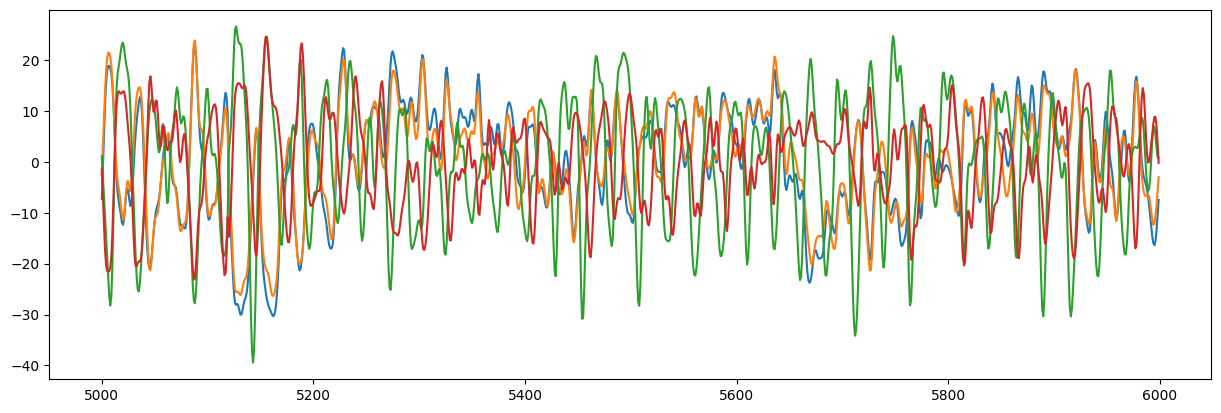

In [8]:
plt.figure().set_figwidth(15)

num1 = 5000
num2 = 6000

# plt.scatter(df_full.index[num1:num2], df_full['Fp1'].values[num1:num2])
# plt.scatter(df_full.index[num1:num2], df_full['Fpz'].values[num1:num2])
# plt.scatter(df_full.index[num1:num2], df_full['P6'].values[num1:num2])
# plt.scatter(df_full.index[num1:num2], df_full['POz'].values[num1:num2])

plt.plot(df_full.index[num1:num2], df_full['Fp1'].values[num1:num2])
plt.plot(df_full.index[num1:num2], df_full['Fpz'].values[num1:num2])
plt.plot(df_full.index[num1:num2], df_full['P6'].values[num1:num2])
plt.plot(df_full.index[num1:num2], df_full['POz'].values[num1:num2])

In [9]:
df_full[channels]

,Fp1,Fpz,Fp2,F1,Fz,F2,AF7,F7,F5,F3,...,P7,PO7,P4,P6,P8,PO8,POz,O1,O2,Oz
0,11.773328,9.809538,13.876945,2.566204,6.091801,2.790185,7.774493,4.781559,3.514991,1.833910,...,-1.200804,-5.816700,-9.692928,-10.558528,-11.867990,-14.944018,-11.150834,-21.941230,-10.897749,-13.362327
1,8.983682,5.674927,10.360162,2.584388,6.603321,1.817233,6.255216,4.473085,5.185444,2.503897,...,2.989296,-4.806878,-8.424823,-10.185038,-14.719209,-15.304664,-10.618583,-22.572649,-10.724655,-13.664377
2,7.960049,3.863100,9.341341,3.383881,7.590122,2.031130,6.202106,4.231051,6.875371,3.219226,...,3.140634,-5.539914,-7.057155,-9.171268,-15.807978,-15.270036,-10.077466,-23.250523,-9.917455,-13.688075
3,9.200035,5.256371,11.193883,4.478626,8.676616,3.263074,7.426116,3.696186,7.047524,3.292503,...,-0.679265,-7.748483,-5.589802,-7.313444,-14.270693,-13.872588,-9.253462,-23.468769,-7.709155,-13.042697
4,11.876700,8.621860,14.079303,5.194163,9.265444,4.448284,9.179627,2.967206,5.457769,2.762174,...,-5.470935,-10.003050,-4.161441,-4.973620,-11.025335,-11.231061,-8.076732,-22.637829,-4.037314,-11.753191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,0.134115,-7.587603,-13.835784,-2.327853,-0.815602,-6.144312,8.589669,10.428081,4.432201,0.261769,...,11.517610,14.002158,1.702654,-0.096496,-0.021360,5.135096,9.472107,6.283570,4.098131,6.077227
25596,-1.445305,-8.761709,-14.259471,-4.049449,-3.617800,-9.114941,7.283334,9.756338,2.900763,-1.416278,...,16.115047,20.031433,3.154056,1.074358,0.103719,9.167023,13.507341,17.467433,13.854275,13.644908
25597,-3.902194,-10.225381,-14.375273,-6.056832,-6.264867,-11.648634,5.095097,7.784328,0.382389,-3.643938,...,20.152143,24.733808,4.180478,1.325014,0.651631,9.718209,16.349000,26.546055,18.652914,17.766322
25598,-6.728267,-12.130537,-14.812755,-8.357046,-8.528276,-13.608210,2.585661,5.548828,-2.058377,-5.827691,...,22.939928,26.339028,5.627419,1.375411,1.090647,6.740210,16.749156,29.947394,17.203949,16.330101


In [44]:
power_bands = {'delta' : (0.5,4) , 'theta' : (4,8) , 'alpha' : (8,12) , 'sigma' : (12,16) , 'beta' : (16,30) , 'gamma' : (30,40) }

fmin = [float(val[0]) for val in power_bands.values()]
fmax = [float(val[1]) for val in power_bands.values()]

In [67]:
%%capture captured_output

t1 = time.time()
methods = ['pli', 'wpli', 'dpli']
con_pli =  spectral_connectivity_epochs(data_epo , method=methods[0] , sfreq=256,fmin=9, fmax=11, faverage=False)

con_pli =  spectral_connectivity_epochs(data_epo , method=methods[0] , sfreq=256,fmin=fmin, fmax=fmax, faverage=True)

con_pli =  spectral_connectivity_epochs(data_epo , method=methods[0] , sfreq=256,fmin=0, fmax=40, faverage=True)

t2 = time.time()

t2 - t1

In [49]:
power_bands

{'delta': (0.5, 4),
 'theta': (4, 8),
 'alpha': (8, 12),
 'sigma': (12, 16),
 'beta': (16, 30),
 'gamma': (30, 40)}

In [62]:
con_pli

<SpectralConnectivity | freq : [20.000000, 20.000000], , nave : 5, nodes, n_estimated : 57, 3249, ~190 kB>

In [66]:
con_pli.get_data('dense')[:,:,0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3980025 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40749064, 0.39700375, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39750312, 0.40049938, 0.37952559, ..., 0.        , 0.        ,
        0.        ],
       [0.39051186, 0.37902622, 0.38202247, ..., 0.35405743, 0.        ,
        0.        ],
       [0.40749064, 0.40299625, 0.43545568, ..., 0.39950062, 0.3855181 ,
        0.        ]])

In [29]:
con_pli.get_data('dense').mean(axis = 2)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45365854, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6195122 , 0.54146341, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57073171, 0.55121951, 0.52195122, ..., 0.        , 0.        ,
        0.        ],
       [0.63902439, 0.65853659, 0.5804878 , ..., 0.49268293, 0.        ,
        0.        ],
       [0.62926829, 0.64878049, 0.54146341, ..., 0.57073171, 0.40487805,
        0.        ]])

In [63]:
con_pli.get_data('dense').shape

(57, 57, 1)

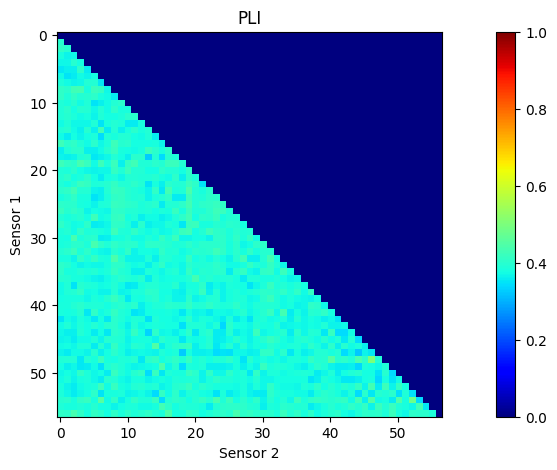

In [74]:
plt.rcParams["figure.figsize"] = (30,20)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

power_band_index = 5

fig, axs = plt.subplots(1, 1, figsize=(14, 5), sharey=True)
# axs.imshow(con_pli.get_data('dense')[:, : , power_band_index], vmin=0, vmax=1)
axs.imshow(con_pli.get_data('dense')[:,:,0], vmin=0, vmax=1)

axs.set_title("PLI")
axs.set_ylabel("Sensor 1")
axs.set_xlabel("Sensor 2")

im = axs.imshow(con_pli.get_data('dense')[:,:,0], vmin=0, vmax=1, cmap = 'jet')
fig.colorbar(im, ax=axs)
plt.savefig("connectivity.png" , dpi = 200)

## Put the data in a dataframe

In [73]:
con_pli.get_data('dense')[:,:,0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3980025 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40749064, 0.39700375, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39750312, 0.40049938, 0.37952559, ..., 0.        , 0.        ,
        0.        ],
       [0.39051186, 0.37902622, 0.38202247, ..., 0.35405743, 0.        ,
        0.        ],
       [0.40749064, 0.40299625, 0.43545568, ..., 0.39950062, 0.3855181 ,
        0.        ]])

In [75]:
power_band_index = 1

channel_names = channels
# connectivity_data = con_pli.get_data('dense')[:, : , power_band_index]
connectivity_data = con_pli.get_data('dense')[:,:,0]

channel_data = connectivity_data

# Create an empty DataFrame
df = pd.DataFrame(index=channel_names, columns=channel_names)

# Fill the DataFrame with connectivity values
for i in range(len(channel_names)):
    for j in range(len(channel_names)):
        channel_1 = channel_names[i]
        channel_2 = channel_names[j]
        connectivity_value = channel_data[i, j]
        df.loc[channel_1, channel_2] = connectivity_value
        df.loc[channel_2, channel_1] = connectivity_value

df = df.apply(pd.to_numeric)
df

,Fp1,Fpz,Fp2,F1,Fz,F2,AF7,F7,F5,F3,...,P7,PO7,P4,P6,P8,PO8,POz,O1,O2,Oz
Fp1,0.000000,0.398002,0.407491,0.382022,0.369538,0.353059,0.372035,0.384519,0.406492,0.409988,...,0.365543,0.390512,0.375031,0.371036,0.372035,0.382022,0.383021,0.397503,0.390512,0.407491
Fpz,0.398002,0.000000,0.397004,0.364544,0.368040,0.360549,0.348065,0.373034,0.399001,0.387516,...,0.358552,0.393009,0.362547,0.377528,0.384020,0.363546,0.371036,0.400499,0.379026,0.402996
Fp2,0.407491,0.397004,0.000000,0.369039,0.395506,0.363046,0.358552,0.364045,0.425968,0.408989,...,0.372534,0.391511,0.371036,0.370537,0.364045,0.355556,0.358552,0.379526,0.382022,0.435456
F1,0.382022,0.364544,0.369039,0.000000,0.378027,0.405493,0.374032,0.370537,0.433458,0.392010,...,0.371536,0.353558,0.353558,0.406991,0.380025,0.374532,0.368539,0.406991,0.388015,0.408489
Fz,0.369538,0.368040,0.395506,0.378027,0.000000,0.359051,0.363546,0.391011,0.381523,0.398002,...,0.363546,0.392509,0.356554,0.384020,0.385019,0.381024,0.377528,0.416479,0.380524,0.382522
F2,0.353059,0.360549,0.363046,0.405493,0.359051,0.000000,0.377029,0.391511,0.417978,0.402497,...,0.398002,0.380025,0.373034,0.368539,0.370537,0.386517,0.402996,0.380524,0.395506,0.412484
AF7,0.372035,0.348065,0.358552,0.374032,0.363546,0.377029,0.000000,0.354557,0.412984,0.382022,...,0.360050,0.417978,0.346567,0.378527,0.357553,0.421973,0.350062,0.456429,0.375031,0.399001
F7,0.384519,0.373034,0.364045,0.370537,0.391011,0.391511,0.354557,0.000000,0.369538,0.371536,...,0.377029,0.382022,0.390512,0.356055,0.396005,0.371536,0.382522,0.372035,0.378027,0.378527
F5,0.406492,0.399001,0.425968,0.433458,0.381523,0.417978,0.412984,0.369538,0.000000,0.357553,...,0.401998,0.378527,0.400000,0.417478,0.391011,0.414981,0.380524,0.406991,0.365044,0.409988
F3,0.409988,0.387516,0.408989,0.392010,0.398002,0.402497,0.382022,0.371536,0.357553,0.000000,...,0.381024,0.388015,0.390512,0.390012,0.371536,0.379526,0.385518,0.360050,0.377029,0.386017


In [32]:
channel_names = channels
connectivity_data = con_pli.get_data('dense')
channel_data = connectivity_data[:, :, 0] 

# Create an empty DataFrame
df = pd.DataFrame(index=channel_names, columns=channel_names)

# Fill the DataFrame with connectivity values
for i in range(len(channel_names)):
    for j in range(len(channel_names)):
        channel_1 = channel_names[i]
        channel_2 = channel_names[j]
        connectivity_value = channel_data[i, j]
        df.loc[channel_1, channel_2] = connectivity_value
        df.loc[channel_2, channel_1] = connectivity_value

df = df.apply(pd.to_numeric)
df

,Fp1,Fpz,Fp2,F1,Fz,F2,AF7,F7,F5,F3,...,P7,PO7,P4,P6,P8,PO8,POz,O1,O2,Oz
Fp1,0.000000,0.453659,0.619512,0.385366,0.609756,0.463415,0.482927,0.521951,0.639024,0.707317,...,0.453659,0.395122,0.453659,0.463415,0.482927,0.482927,0.492683,0.570732,0.639024,0.629268
Fpz,0.453659,0.000000,0.541463,0.375610,0.707317,0.492683,0.512195,0.531707,0.600000,0.707317,...,0.473171,0.375610,0.502439,0.541463,0.541463,0.482927,0.590244,0.551220,0.658537,0.648780
Fp2,0.619512,0.541463,0.000000,0.521951,0.590244,0.521951,0.443902,0.482927,0.521951,0.648780,...,0.443902,0.395122,0.356098,0.473171,0.346341,0.473171,0.424390,0.521951,0.580488,0.541463
F1,0.385366,0.375610,0.521951,0.000000,0.726829,0.512195,0.590244,0.560976,0.697561,0.785366,...,0.551220,0.346341,0.521951,0.629268,0.473171,0.551220,0.570732,0.580488,0.687805,0.756098
Fz,0.609756,0.707317,0.590244,0.726829,0.000000,0.268293,0.609756,0.658537,0.668293,0.629268,...,0.629268,0.629268,0.482927,0.590244,0.639024,0.746341,0.658537,0.687805,0.629268,0.629268
F2,0.463415,0.492683,0.521951,0.512195,0.268293,0.000000,0.307317,0.453659,0.463415,0.453659,...,0.424390,0.404878,0.307317,0.356098,0.473171,0.336585,0.463415,0.385366,0.375610,0.551220
AF7,0.482927,0.512195,0.443902,0.590244,0.609756,0.307317,0.000000,0.502439,0.746341,0.707317,...,0.482927,0.560976,0.463415,0.297561,0.492683,0.434146,0.482927,0.697561,0.560976,0.678049
F7,0.521951,0.531707,0.482927,0.560976,0.658537,0.453659,0.502439,0.000000,0.443902,0.560976,...,0.434146,0.463415,0.434146,0.512195,0.648780,0.521951,0.414634,0.512195,0.512195,0.365854
F5,0.639024,0.600000,0.521951,0.697561,0.668293,0.463415,0.746341,0.443902,0.000000,0.551220,...,0.443902,0.356098,0.473171,0.697561,0.473171,0.756098,0.395122,0.473171,0.443902,0.726829
F3,0.707317,0.707317,0.648780,0.785366,0.629268,0.453659,0.707317,0.560976,0.551220,0.000000,...,0.453659,0.502439,0.414634,0.658537,0.570732,0.648780,0.531707,0.512195,0.346341,0.609756


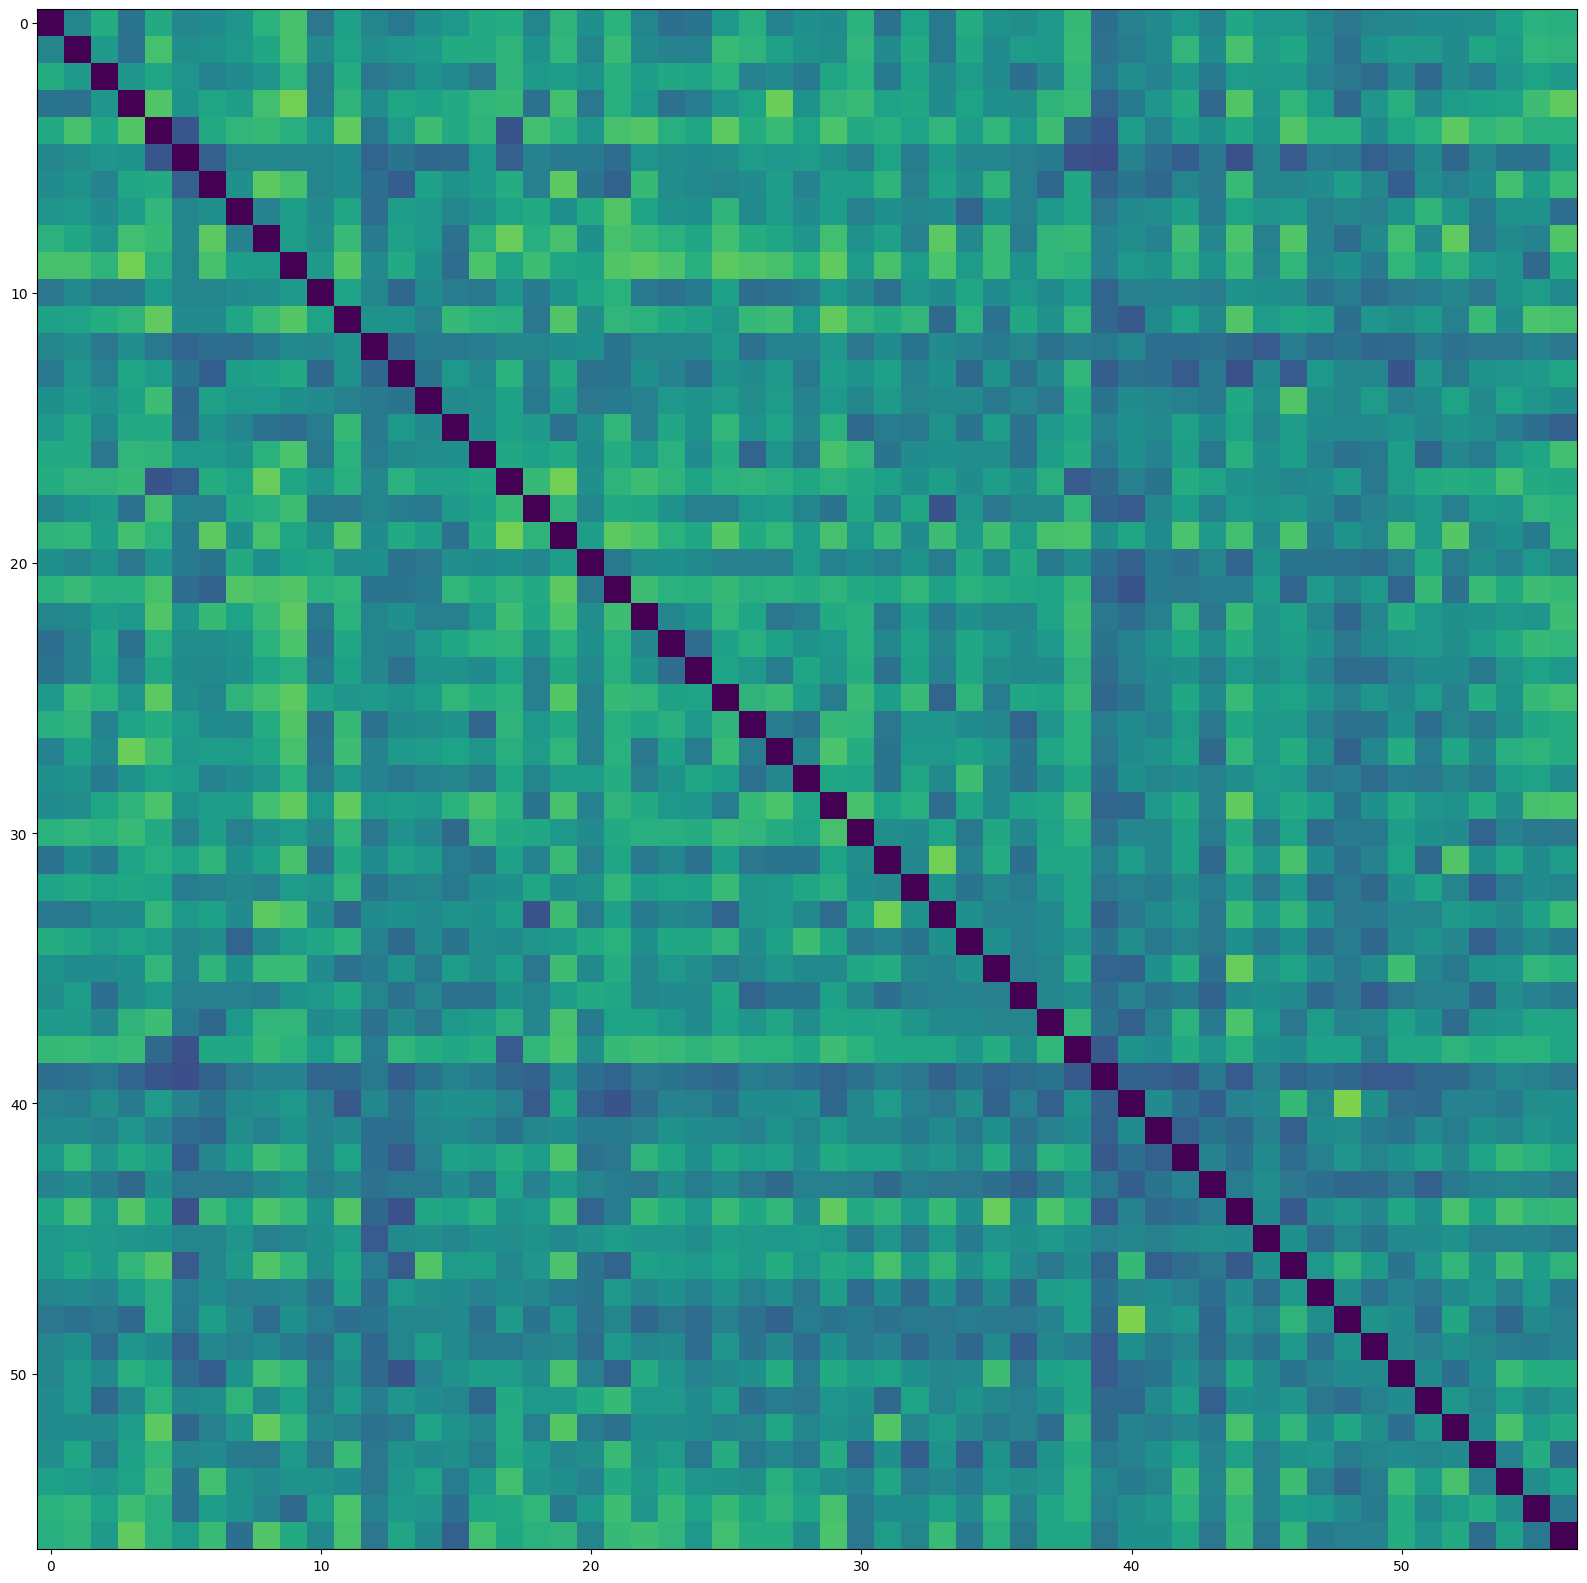

In [109]:
plt.imshow(df.values, vmin=0, vmax=1)

In [91]:
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

NameError: name 'sns' is not defined

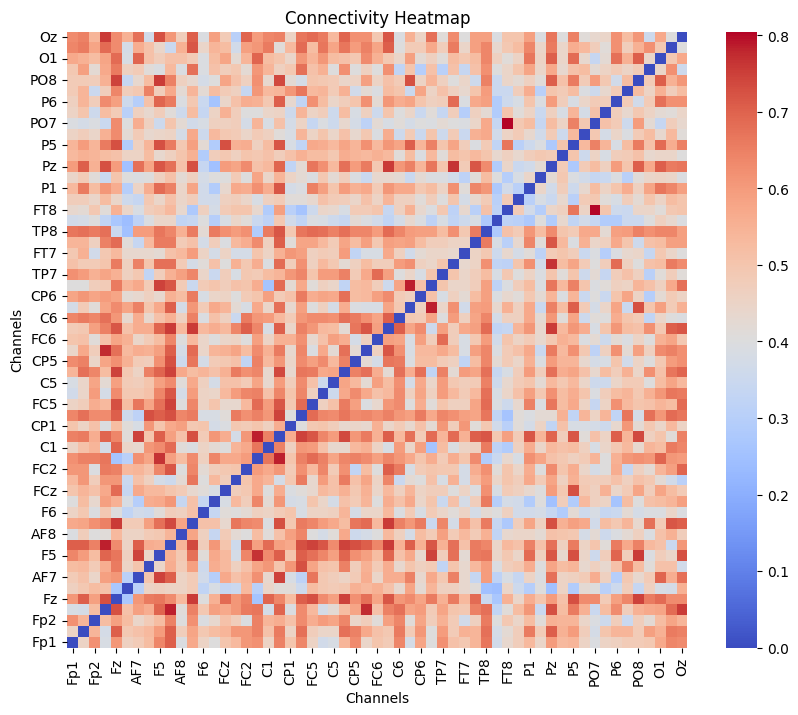

In [110]:
# Plot heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure

# Customize the heatmap
sns.heatmap(df.iloc[::-1], cmap='coolwarm', annot=False, fmt=".2f", cbar=True)

# Add labels and title
plt.xlabel("Channels")
plt.ylabel("Channels")
plt.title("Connectivity Heatmap")

# Display the plot
plt.show()
plt.savefig

In [ ]:
electrode_1 --> 2 | Electrode1 --3 |